In [0]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


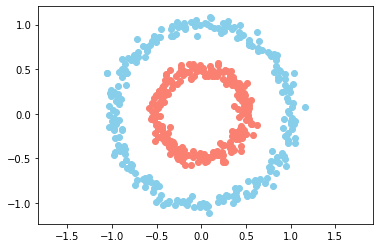

In [2]:
# Crear dataset

n=500
p=2 #numero de caractaristicas

X, Y=make_circles(n_samples=n, factor=0.5, noise=0.05)
Y=Y[:, np.newaxis]
plt.scatter(X[Y[:,0] ==0 , 0], X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0] ==1 , 0], X[Y[:,0]==1,1], c="salmon")
plt.axis('equal')
plt.show()

In [3]:
Y.shape

(500, 1)

In [0]:
#Clase capa red
class neural_layer:
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f=act_f
    self.b=np.random.rand(1, n_neur)*2 -1
    self.W=np.random.rand(n_conn, n_neur)*2 -1

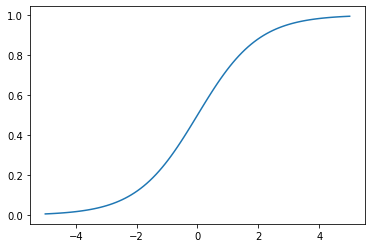

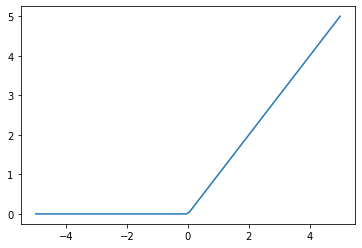

In [5]:
#Funciones de activacion
sigm=(lambda x: 1/(1+ np.e**(-x)),
      lambda x: x*(1-x))

relu=lambda x: np.maximum(0,x)

_x=np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))
plt.show()

plt.plot(_x, relu(_x))
plt.show()

In [0]:
l0=neural_layer(p, 4, sigm)
l1=neural_layer(4,8, sigm)
#...

def create_nn(topology, act_f):
  nn=[]
  for i, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[i], topology[i+1], act_f))
  return nn

In [10]:
topology=[p, 4, 8, 1]
neural_net=create_nn(topology, sigm)

l2_cost=(lambda Yp, Yr: np.mean((Yp-Yr)**2),
         lambda Yp, Yr: (Yp-Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out=[(None, X)]
  #Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #Suma ponderada
    a = neural_net[l].act_f[0](z)
    out.append((z,a))


  if train:
    #Backward pass
    deltas=[]
    for l in reversed(range(0, len(neural_net))):
      z=out[l+1][0]
      a=out[l+1][1]
      
      if l== len(neural_net)-1:
        #Calcular last layer
        deltas.insert(0, l2_cost[1](a, Y)*neural_net[l].act_f[1](a))
      else:
        #Calcular delta respecto capa previa
        deltas.insert(0, deltas[0]@ _W.T * neural_net[l].act_f[1](a))
      _W=neural_net[l].W
      #Gradient descent
      neural_net[l].b=neural_net[l].b-np.mean(deltas[0], axis=0, keepdims=True)*lr
      neural_net[l].W=neural_net[l].W-out[l][1].T @ deltas[0]*lr
  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

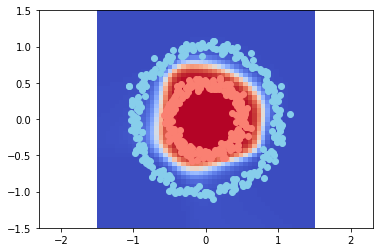

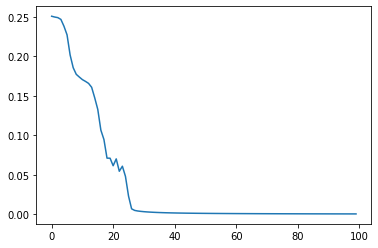

In [11]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  